In [94]:
from importlib.machinery import SourceFileLoader
helpers = SourceFileLoader("helpers", "../helpers.py").load_module()
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint

network_intrusion_data_frame = pd.read_csv('./dataset/network_intrusion_data.csv')


def label_encoder(label):
    if(label == 'normal.'):
        return '0'
    return '1'


columns = [
    'duration',   
    'protocol_type',    
    'service',    
    'flag',    
    'src_bytes',    
    'dst_bytes',    
    'land',    
    'wrong_fragment',    
    'urgent',    
    'hot',    
    'num_failed_logins',    
    'logged_in',    
    'num_compromised',    
    'root_shell',    
    'su_attempted',
    'num_root',    
    'num_file_creations',    
    'num_shells',    
    'num_access_files',    
    'num_outbound_cmds',    
    'is_host_login',   
    'is_guest_login',   
    'count',  
    'srv_count',  
    'serror_rate',   
    'srv_serror_rate', 
    'rerror_rate',  
    'srv_rerror_rate', 
    'same_srv_rate',   
    'diff_srv_rate',    
    'srv_diff_host_rate',  
    'dst_host_count', 
    'dst_host_srv_count',  
    'dst_host_same_srv_rate', 
    'dst_host_diff_srv_rate',    
    'dst_host_same_src_port_rate',  
    'dst_host_srv_diff_host_rate',  
    'dst_host_serror_rate',  
    'dst_host_srv_serror_rate',  
    'dst_host_rerror_rate',   
    'dst_host_srv_rerror_rate',    
    'outcome'] 


network_intrusion_data_frame.columns = columns

# drop rows with missing values since data is not complete
network_intrusion_data_frame.dropna()

# drop redudant rows so we do not get biased data in testing phase
network_intrusion_data_frame.drop_duplicates(keep='first', inplace=True)

# here i encoded all normal outcomes to 0 and attacks to 1
network_intrusion_data_frame['outcome'] = network_intrusion_data_frame['outcome'].map(label_encoder)

outcome = helpers.encode_text_index(network_intrusion_data_frame,'outcome')

for x in columns:
    if(x != 'outcome'):
        helpers.encode_text_index(network_intrusion_data_frame, x)
    


# Fully-Connected Neural Network Training 



In [95]:
x,y = helpers.to_xy(network_intrusion_data_frame, 'outcome')

x_train, x_test, y_train, y_test = train_test_split(x, y)

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", verbose=0, save_best_only=True) # save best model

#  relu and adam

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=0,epochs=100)

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test,axis=1)


score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))
    

cm = confusion_matrix(y_true, pred)

plt.figure()
helpers.plot_confusion_matrix(cm, outcome)
plt.show()

print(classification_report(y_true, pred))

# relu and sgd

Train on 109188 samples, validate on 36397 samples
Epoch 1/5
109188/109188 - 3s - loss: 0.2818 - val_loss: 0.1002
Epoch 2/5
109188/109188 - 3s - loss: 0.0948 - val_loss: 0.0960
Epoch 3/5
109188/109188 - 3s - loss: 0.0926 - val_loss: 0.0951
Epoch 4/5
109188/109188 - 3s - loss: 0.0920 - val_loss: 0.0947
Epoch 5/5
109188/109188 - 3s - loss: 0.0917 - val_loss: 0.0942
Final accuracy: 0.9782674396241449


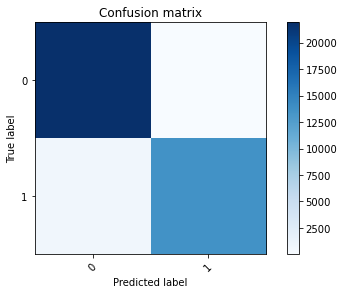

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21928
           1       1.00      0.95      0.97     14469

    accuracy                           0.98     36397
   macro avg       0.98      0.97      0.98     36397
weighted avg       0.98      0.98      0.98     36397



In [90]:
model = Sequential()
model.add(Dense(20, input_dim=x.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=0,epochs=100)

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test,axis=1)


score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))
    

cm = confusion_matrix(y_true, pred)

plt.figure()
helpers.plot_confusion_matrix(cm, outcome)
plt.show()

print(classification_report(y_true, pred))

# sigmoid and adam

Train on 109188 samples, validate on 36397 samples
Epoch 1/5
109188/109188 - 4s - loss: 0.0847 - val_loss: 0.0319
Epoch 2/5
109188/109188 - 3s - loss: 0.0279 - val_loss: 0.0211
Epoch 3/5
109188/109188 - 3s - loss: 0.0233 - val_loss: 0.0205
Epoch 4/5
109188/109188 - 3s - loss: 0.0204 - val_loss: 0.0202
Epoch 5/5
109188/109188 - 4s - loss: 0.0205 - val_loss: 0.0241
Final accuracy: 0.992884028903481


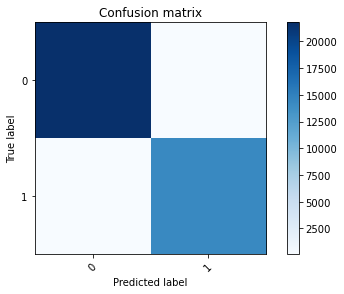

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     21928
           1       0.99      0.99      0.99     14469

    accuracy                           0.99     36397
   macro avg       0.99      0.99      0.99     36397
weighted avg       0.99      0.99      0.99     36397



In [93]:
model = Sequential()
model.add(Dense(20, input_dim=x.shape[1], activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=0,epochs=100)

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test,axis=1)


score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))
    

cm = confusion_matrix(y_true, pred)

plt.figure()
helpers.plot_confusion_matrix(cm, outcome)
plt.show()

print(classification_report(y_true, pred))

# sigmoid and sgd

In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=x.shape[1], activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=0,epochs=100)

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test,axis=1)


score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))
    

cm = confusion_matrix(y_true, pred)

plt.figure()
helpers.plot_confusion_matrix(cm, outcome)
plt.show()

print(classification_report(y_true, pred))

# tanh and adam

Train on 109188 samples, validate on 36397 samples
Epoch 1/5
109188/109188 - 3s - loss: 0.1047 - val_loss: 0.0873
Epoch 2/5
109188/109188 - 3s - loss: 0.0804 - val_loss: 0.0718
Epoch 3/5
109188/109188 - 3s - loss: 0.0739 - val_loss: 0.0703
Epoch 4/5
109188/109188 - 3s - loss: 0.0682 - val_loss: 0.0483
Epoch 5/5
109188/109188 - 3s - loss: 0.0692 - val_loss: 0.0847
Final accuracy: 0.979009259004863


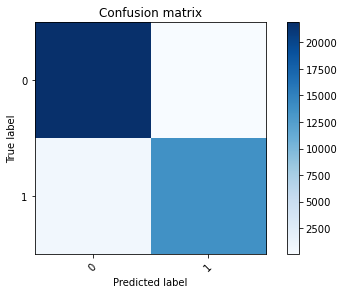

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21928
           1       1.00      0.95      0.97     14469

    accuracy                           0.98     36397
   macro avg       0.98      0.97      0.98     36397
weighted avg       0.98      0.98      0.98     36397



In [86]:
model = Sequential()
model.add(Dense(20, input_dim=x.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=0,epochs=100)

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test,axis=1)


score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))
    

cm = confusion_matrix(y_true, pred)

plt.figure()
helpers.plot_confusion_matrix(cm, outcome)
plt.show()

print(classification_report(y_true, pred))

# tanh and sgd

Train on 109188 samples, validate on 36397 samples
Epoch 1/5
109188/109188 - 4s - loss: 0.1009 - val_loss: 0.0842
Epoch 2/5
109188/109188 - 3s - loss: 0.0782 - val_loss: 0.0693
Epoch 3/5
109188/109188 - 3s - loss: 0.0662 - val_loss: 0.0671
Epoch 4/5
109188/109188 - 3s - loss: 0.0703 - val_loss: 0.0762
Epoch 5/5
109188/109188 - 3s - loss: 0.0711 - val_loss: 0.0724
Final accuracy: 0.9787345110860786


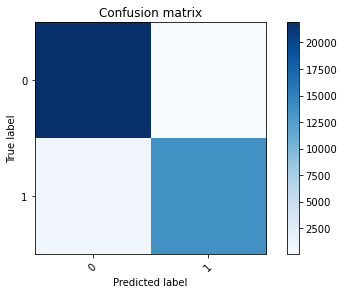

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21928
           1       1.00      0.95      0.97     14469

    accuracy                           0.98     36397
   macro avg       0.98      0.97      0.98     36397
weighted avg       0.98      0.98      0.98     36397



In [92]:
model = Sequential()
model.add(Dense(20, input_dim=x.shape[1], activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=0,epochs=100)

pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test,axis=1)


score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))
    

cm = confusion_matrix(y_true, pred)

plt.figure()
helpers.plot_confusion_matrix(cm, outcome)
plt.show()

print(classification_report(y_true, pred))

# Convolutional Neural Networks (CNN)

In [42]:
# turning into numpy array simulates an image. 
x = network_intrusion_data_frame.to_numpy()
y = network_intrusion_data_frame['outcome'].to_numpy()

In [43]:
import tensorflow as tf

rowLength = len(x)
columLength = len(x[0])

x = x.reshape((rowLength, 1, columLength, 1))
y_one_hot = tf.keras.utils.to_categorical(y, 2)

In [70]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x_train, x_test, y_train, y_test = train_test_split(x, y_one_hot)

# convert to float32 for normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize the data values to the range [0, 1]
x_train /= 255
x_test /= 255

# remove data that may have went missing from normalization
x_train = x_train[~np.isnan(x_train)]
x_test = x_test[~np.isnan(x_test)]

1528674
1528674


In [69]:
from tensorflow.keras.optimizers import Adam

checkpointer = ModelCheckpoint(filepath="best_weights2.hdf5", verbose=0, save_best_only=True) # save best model

cnn = Sequential()

cnn.add(Conv2D(64, kernel_size=(1, 2), strides=(1, 1), activation='relu', input_shape=(1, 42, 1)))
cnn.add(MaxPooling2D(pool_size=(1,2)))
cnn.add(Conv2D(128, kernel_size=(1, 2), strides=(1, 1), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(1,2)))
cnn.add(Flatten())
cnn.add(Dense(1024, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation="softmax"))

cnn.compile(loss="categorical_crossentropy", optimizer="adam")

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

cnn.fit(x_train, y_train, callbacks=[monitor,checkpointer], epochs=10, verbose=0,validation_data=(x_test, y_test))

0


ValueError: Error when checking input: expected conv2d_22_input to have 4 dimensions, but got array with shape (4585896, 1)

Final accuracy: 0.9961535291370168


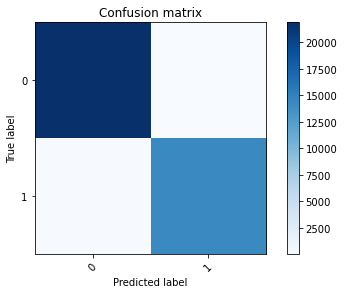

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     21905
           1       1.00      0.99      1.00     14492

    accuracy                           1.00     36397
   macro avg       1.00      1.00      1.00     36397
weighted avg       1.00      1.00      1.00     36397



In [41]:
cnn = Sequential()
cnn.add(Conv2D(64, kernel_size=(1, 2), strides=(1, 1), activation='relu',input_shape=(1, 42, 1)))
cnn.add(MaxPooling2D(pool_size=(1,2)))
cnn.add(Conv2D(128, kernel_size=(1, 2), strides=(1, 1), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(1,2)))
cnn.add(Flatten())
cnn.add(Dense(1024, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(2, activation="softmax"))

cnn.compile(loss="categorical_crossentropy", optimizer="adam")

cnn.load_weights('best_weights2.hdf5') # load weights from best model


pred = cnn.predict(x_test)
pred = np.argmax(pred,axis=1)
y_true = np.argmax(y_test,axis=1)


score = metrics.accuracy_score(y_true, pred)
print("Final accuracy: {}".format(score))

cm = confusion_matrix(y_true, pred)

plt.figure()
helpers.plot_confusion_matrix(cm, outcome)
plt.show()

print(classification_report(y_true, pred))